# 7-MonteCarlo Sampling

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OpenJij/OpenJijTutorial/blob/master/source/ja/7-MonteCarloSampling.ipynb)

OpenJij は Simulated annealing を実行しますが、温度を一定に保てば、その温度でのボルツマン分布

$$
p(\{\sigma\}) = \frac{\exp(-\beta E(\{\sigma\}))}{Z},~Z = \sum_{\{\sigma\}}\exp(-\beta E(\{\sigma\}))
$$

からスピン配列をサンプルすることができます。

In [1]:
import openjij as oj
import numpy as np
sampler = oj.SASampler(num_reads=100)

def fully_connected(n):
    h, J = {}, {}
    for i in range(n-1):
        for j in range(i+1, n):
            J[i, j] = -1/n
    return h, J

h, J = fully_connected(n=500)

In [79]:
temp_list = np.linspace(0.01, 2, 30)

mag, mag_std = [], []
for temp in temp_list:
    beta = 1.0/temp
    schedule = [[beta, 100]]
    response = sampler.sample_ising(h, J, schedule=schedule)
    mag_list = [np.abs(np.mean(state)) for state in response.states]
    mag_std.append(np.std(mag_list))
    mag.append(np.mean(mag_list))

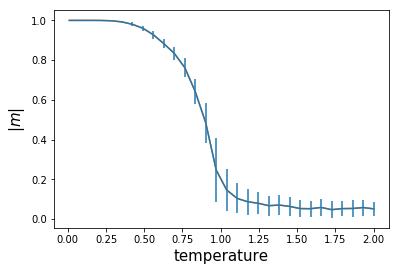

In [80]:
import matplotlib.pyplot as plt

plt.errorbar(temp_list, mag, yerr=mag_std)
plt.plot(temp_list, mag)
plt.xlabel('temperature', fontsize=15)
plt.ylabel(r'$|m|$', fontsize=15)
plt.show()

## Binder cumulant

$$U_4 = \frac{\langle m^4\rangle}{\langle m^2\rangle^2}$$

In [2]:
def u_4(states):
    m = np.array([np.mean(state) for state in states])
    return np.mean(m**4)/(np.mean(m**2)**2)

In [4]:
n_list = [40, 80, 160]
temp_list = np.linspace(0.5, 1.5, 30)

sampler = oj.SASampler(num_reads=300)

u4_list_n = []
for n in n_list:
    # make instance
    h, J = fully_connected(n)
    u4_temp = []
    for temp in temp_list:
        beta = 1.0/temp
        schedule = [[beta, 100 if temp < 0.9 else 300]]
    
        response = sampler.sample_ising(h, J, 
                                        schedule=schedule, reinitialize_state=False,
                                        num_reads=100 if temp < 0.9 else 1000
                                       )
        u4_temp.append(u_4(response.states))
    u4_list_n.append(u4_temp)

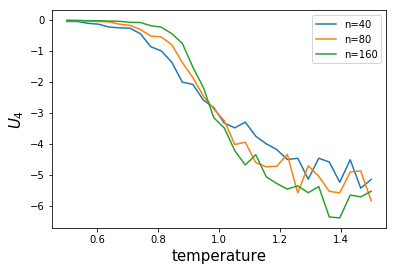

In [9]:
import matplotlib.pyplot as plt

for n,u4_beta in zip(n_list,u4_list_n):
    plt.plot(temp_list, (-np.array(u4_beta)+1)*3, label='n={}'.format(n))

plt.legend()
plt.ylabel('$U_4$', fontsize=15)
plt.xlabel('temperature', fontsize=15)
plt.show()